<a href="https://colab.research.google.com/github/Khizer-Data/Intrusion-Detection-System-NSL-KDD/blob/main/Intrusion_Detection_System_NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intrusion Detection System
##Dataset : NSL-KDD

##Project Overview
Objective: To develop an Intrusion Detection System (IDS) using machine learning models (XGBoost and Random Forest) to detect DDoS attacks from network traffic data. The NSL-KDD dataset will be used, focusing on binary classification: normal (0) and anomaly (1).

Remove columns such as id, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, and is_guest_login.

#Import Libraries

In [29]:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



#Import Dataset

In [30]:
df =pd.read_excel('csv_result-KDDTrain+.xlsx')

In [31]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Here is a one-line definition for each feature from the NSL-KDD dataset:

1. **duration**: Length (in seconds) of the connection.
2. **protocol_type**: Type of protocol (e.g., TCP, UDP, ICMP).
3. **service**: Network service on the destination (e.g., HTTP, FTP, SSH).
4. **flag**: State of the connection (e.g., SF, REJ).
5. **src_bytes**: Number of data bytes sent from the source to the destination.
6. **dst_bytes**: Number of data bytes sent from the destination to the source.
7. **land**: Binary indicator if the connection is from/to the same host/port.
8. **wrong_fragment**: Number of wrong fragments in the connection.
9. **urgent**: Number of urgent packets in the connection.
10. **count**: Number of connections to the same host in the past 2 seconds.
11. **srv_count**: Number of connections to the same service in the past 2 seconds.
12. **serror_rate**: Percentage of connections that have SYN errors.
13. **srv_serror_rate**: Percentage of connections to the same service that have SYN errors.
14. **rerror_rate**: Percentage of connections that have REJ errors.
15. **srv_rerror_rate**: Percentage of connections to the same service that have REJ errors.
16. **same_srv_rate**: Percentage of connections to the same service.
17. **diff_srv_rate**: Percentage of connections to different services.
18. **srv_diff_host_rate**: Percentage of connections to different hosts.
19. **dst_host_count**: Number of connections to the same destination host.
20. **dst_host_srv_count**: Number of connections to the same service on the destination host.
21. **dst_host_same_srv_rate**: Percentage of connections to the same service on the destination host.
22. **dst_host_diff_srv_rate**: Percentage of connections to different services on the destination host.
23. **dst_host_same_src_port_rate**: Percentage of connections to the destination host from the same source port.
24. **dst_host_srv_diff_host_rate**: Percentage of connections to the same service on different hosts.
25. **dst_host_serror_rate**: Percentage of connections to the destination host that have SYN errors.
26. **dst_host_srv_serror_rate**: Percentage of connections to the same service on the destination host that have SYN errors.
27. **dst_host_rerror_rate**: Percentage of connections to the destination host that have REJ errors.
28. **dst_host_srv_rerror_rate**: Percentage of connections to the same service on the destination host that have REJ errors.

#Describe Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   count                        125973 non-null  int64  
 10  srv_count                    125973 non-null  int64  
 11  serror_rate                  125973 non-null  float64
 12  srv_serror_rate              125973 non-null  float64
 13 

In [33]:

unique_services = df['service'].unique()
print(unique_services)


['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


Here is a one-line definition for each of these services from the NSL-KDD dataset:
Sure! Here's a simple explanation for each service from the NSL-KDD dataset:

1. **ftp_data**: Transfers files between computers.
2. **other**: Various other network services not specifically listed.
3. **private**: Services meant for private use.
4. **http**: Web browsing service.
5. **remote_job**: Submits jobs to be processed remotely.
6. **name**: Looks up computer names.
7. **netbios_ns**: Finds NetBIOS names on a network.
8. **eco_i**: Reversed echo service (sends back received data).
9. **mtp**: Sends emails between servers.
10. **telnet**: Logs into computers remotely.
11. **finger**: Shows user information.
12. **domain_u**: Translates domain names to IP addresses (UDP).
13. **supdup**: Accesses remote terminals.
14. **uucp_path**: Finds paths for Unix-to-Unix file transfers.
15. **Z39_50**: Searches and retrieves information from databases.
16. **smtp**: Sends emails.
17. **csnet_ns**: Looks up CSNET names.
18. **uucp**: Transfers files between Unix computers.
19. **netbios_dgm**: Sends NetBIOS datagrams (packets).
20. **urp_i**: General unspecified service.
21. **auth**: Verifies user identities.
22. **domain**: Translates domain names to IP addresses (TCP).
23. **ftp**: Controls file transfers.
24. **bgp**: Manages routing between large networks.
25. **ldap**: Accesses directory services.
26. **ecr_i**: Extended command and control service.
27. **gopher**: Searches and retrieves documents.
28. **vmnet**: Connects virtual machines on a network.
29. **systat**: Shows system statistics.
30. **http_443**: Secure web browsing (HTTPS).
31. **efs**: Forwards emails.
32. **whois**: Provides domain name registration info.
33. **imap4**: Retrieves emails from a server.
34. **iso_tsap**: Connects to network services using ISO standards.
35. **echo**: Sends back received data.
36. **klogin**: Logs in using Kerberos security.
37. **link**: Deals with link layer network protocols.
38. **sunrpc**: Calls services on remote computers.
39. **login**: Handles user logins.
40. **kshell**: Provides a secure command shell using Kerberos.
41. **sql_net**: Connects to SQL databases.
42. **time**: Provides the current time.
43. **hostnames**: Resolves hostnames.
44. **exec**: Runs commands on remote computers.
45. **ntp_u**: Syncs time using Network Time Protocol (UDP).
46. **discard**: Discards received data.
47. **nntp**: Transfers news articles.
48. **courier**: Manages email deliveries.
49. **ctf**: Traces common operations in a network.
50. **ssh**: Provides a secure remote login.
51. **daytime**: Provides the current date and time.
52. **shell**: Provides a command shell for remote login.
53. **netstat**: Shows network statistics.
54. **pop_3**: Retrieves emails from a server (version 3).
55. **nnsp**: Transfers news articles (similar to NNTP).
56. **IRC**: Chat service.
57. **pop_2**: Retrieves emails from a server (version 2).
58. **printer**: Manages network printing.
59. **tim_i**: Provides timing information.
60. **pm_dump**: Dumps performance monitoring data.
61. **red_i**: Handles redundant command and control info.
62. **netbios_ssn**: Manages NetBIOS sessions.
63. **rje**: Submits remote jobs for execution.
64. **X11**: Manages graphical interfaces over a network.
65. **urh_i**: General unspecified service.
66. **http_8001**: Web browsing on port 8001.
67. **aol**: America Online service.
68. **http_2784**: Web browsing on port 2784.
69. **tftp_u**: Simple file transfers (UDP).
70. **harvest**: Collects data.

In [34]:

unique_flag = df['flag'].unique()
print(unique_flag)


['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


Here is a one-line definition for each connection state flag from the NSL-KDD dataset:

1. **SF**: Normal connection, no errors.
2. **S0**: Connection attempt seen, no reply.
3. **REJ**: Connection attempt rejected.
4. **RSTR**: Connection reset after established.
5. **SH**: Connection halfway open.
6. **RSTO**: Connection reset by the other host.
7. **S1**: Connection established, but no data sent.
8. **RSTOS0**: Connection reset and no reply from the other host.
9. **S3**: Connection established, but no data sent after multiple attempts.
10. **S2**: Connection established and data exchanged.
11. **OTH**: No valid TCP connection state.

In [35]:

unique_protocol_type = df['protocol_type'].unique()
print(unique_protocol_type)


['tcp' 'udp' 'icmp']




1. **tcp**: Transmission Control Protocol, a connection-oriented protocol that ensures reliable data transmission between devices.
2. **udp**: User Datagram Protocol, a connectionless protocol that allows for faster data transmission without guaranteed delivery.
3. **icmp**: Internet Control Message Protocol, used for sending error messages and operational information, primarily in network diagnostics like ping and traceroute.

In [36]:


unique_classes = df['class'].unique()

print(f"Unique classes: {unique_classes}")


Unique classes: ['normal' 'anomaly']


In [37]:
df.size

3653217

In [38]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,84.107555,27.737888,0.284485,0.282485,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,114.508607,72.635840,0.446456,0.447022,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,511.000000,511.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Check class Imbalance

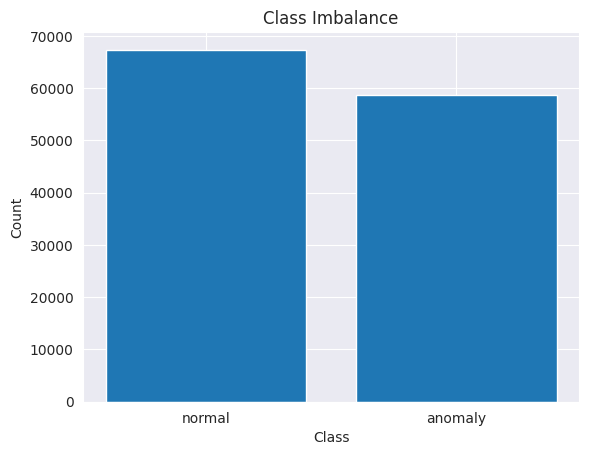

In [39]:

class_counts = df['class'].value_counts()

# Create a bar chart of the class counts
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.show()


In [40]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])

df['service'] = label_encoder.fit_transform(df['service'])

df['flag'] = label_encoder.fit_transform(df['flag'])


In [41]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,44,9,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,24,9,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,24,9,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


#Split Dataset

In [42]:
from sklearn.model_selection import StratifiedKFold

# Assume df is your dataframe and 'class' is the target column
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(df, df['class']):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Now you can use train_data and test_data for your model training and testing

#Show Both classes

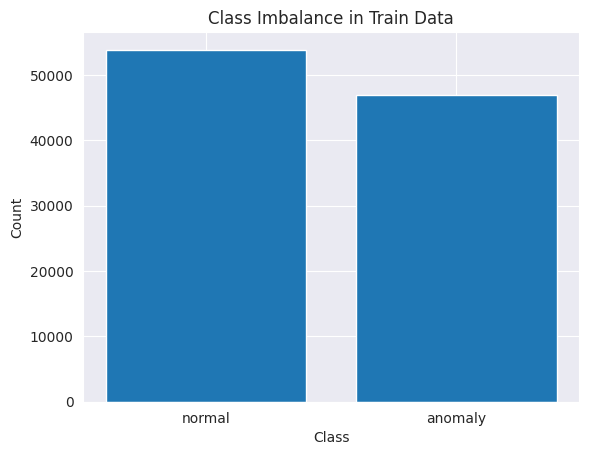

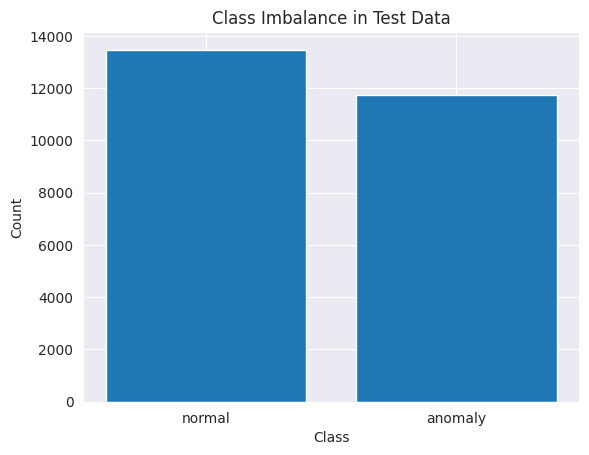

In [43]:


train_class_counts = train_data['class'].value_counts()
test_class_counts = test_data['class'].value_counts()

# Create a bar chart of the class counts for train data
plt.bar(train_class_counts.index, train_class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance in Train Data')
plt.show()

# Create a bar chart of the class counts for test data
plt.bar(test_class_counts.index, test_class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance in Test Data')
plt.show()

#Class Balance using SMOTE

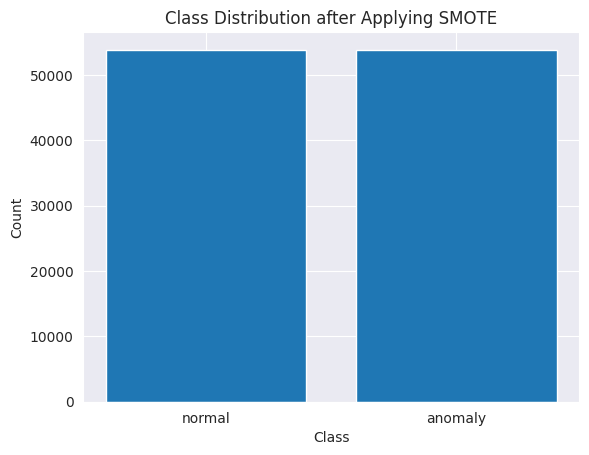

In [44]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = train_data.drop('class', axis=1), train_data['class']
X_test, y_test = test_data.drop('class', axis=1), test_data['class']

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
train_class_counts_resampled = pd.Series(y_train_resampled).value_counts()

# Create a bar chart of the class counts after applying SMOTE
plt.bar(train_class_counts_resampled.index, train_class_counts_resampled.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution after Applying SMOTE')
plt.show()

In [45]:

# Convert the 'class' column into binary values (normal as 0 and anomaly as 1)
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Check the head of the DataFrame
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


#Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



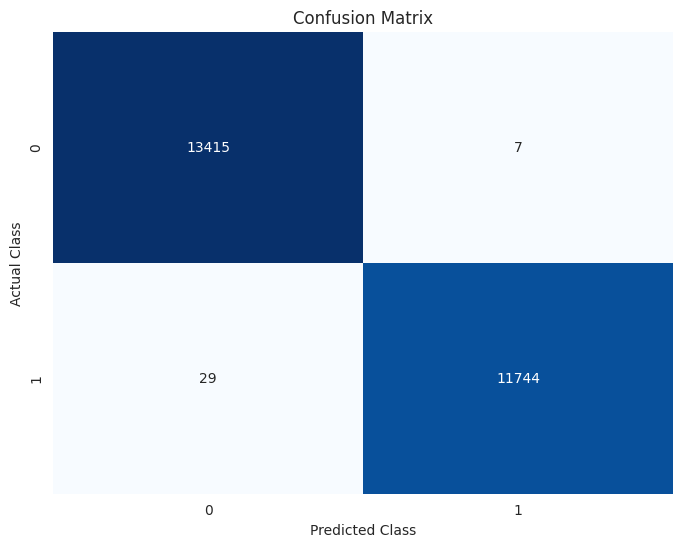

In [46]:


from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

#XGB Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



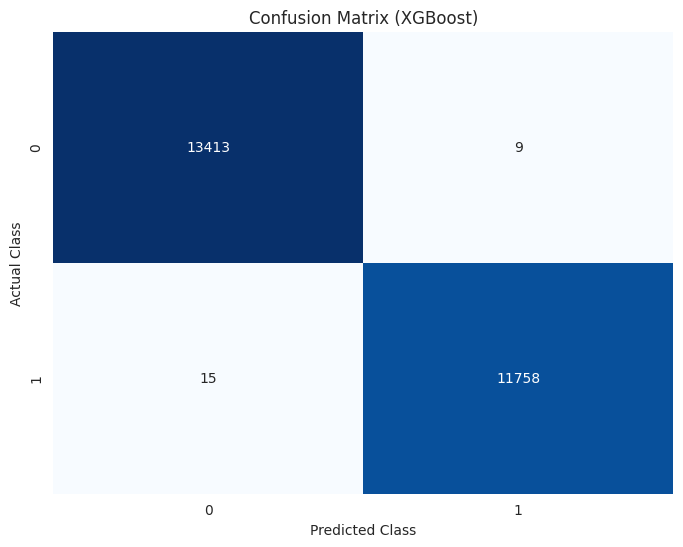

In [47]:


from xgboost import XGBClassifier

# Create an XGBClassifier object
xgb = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

# Create a confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

In [48]:
ds =pd.read_csv('csv_result-KDDTest+.csv')

In [49]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

ds['protocol_type'] = label_encoder.fit_transform(ds['protocol_type'])

ds['service'] = label_encoder.fit_transform(ds['service'])

ds['flag'] = label_encoder.fit_transform(ds['flag'])

In [50]:


# Convert the 'class' column into binary values
ds['class'] = ds['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Check the head of the DataFrame
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.80      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.79      0.78     22544



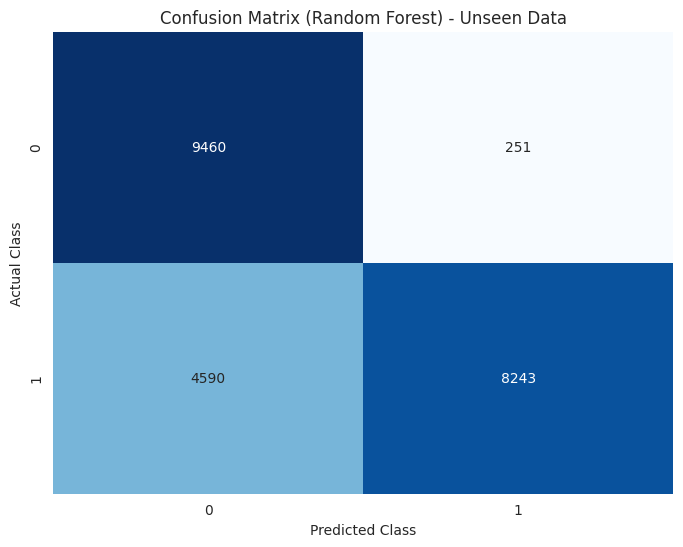

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81      9711
           1       0.97      0.68      0.80     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544



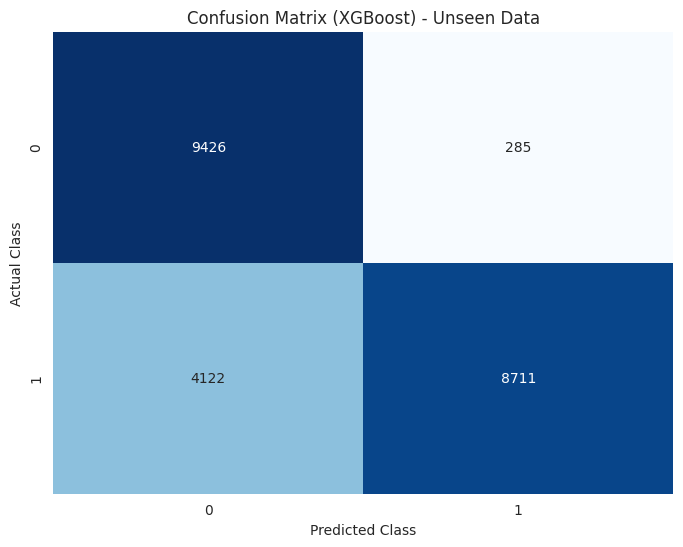

In [51]:

# Predict the class labels for the unseen data using Random Forest
y_pred_ds_rfc = rfc.predict(ds.drop('class', axis=1))

# Create a confusion matrix for Random Forest
cm_ds_rfc = confusion_matrix(ds['class'], y_pred_ds_rfc)

# Print the classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(ds['class'], y_pred_ds_rfc))

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ds_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix (Random Forest) - Unseen Data')
plt.show()


# Predict the class labels for the unseen data using XGBoost
y_pred_ds_xgb = xgb.predict(ds.drop('class', axis=1))

# Create a confusion matrix for XGBoost
cm_ds_xgb = confusion_matrix(ds['class'], y_pred_ds_xgb)

# Print the classification report for XGBoost
print("XGBoost Classification Report:")
print(classification_report(ds['class'], y_pred_ds_xgb))

# Plot the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ds_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix (XGBoost) - Unseen Data')
plt.show()

##UDP Storm attack

A UDP Storm attack is like sending a flood of useless letters to someone's mailbox, overwhelming them so they can't handle legitimate mail. In this attack, the attacker sends a massive amount of useless data (UDP packets) to a target's computer or network, flooding it with traffic and making it difficult for the target to handle real requests or responses.

In [52]:


dos_attack_record = [
    0,     # duration
    2,     # protocol_type (udp)
    2,     # service (other)
    1,     # flag (SF)
    0,     # src_bytes
    0,     # dst_bytes
    0,     # land
    0,     # wrong_fragment
    0,     # urgent
    511,   # count
    511,   # srv_count
    0.0,   # serror_rate
    0.0,   # srv_serror_rate
    0.12,  # rerror_rate
    0.12,  # srv_rerror_rate
    0.03,  # same_srv_rate
    0.03,  # diff_srv_rate
    0.0,   # srv_diff_host_rate
    255,   # dst_host_count
    255,   # dst_host_srv_count
    0.05,  # dst_host_same_srv_rate
    0.0,   # dst_host_diff_srv_rate
    0.0,   # dst_host_same_src_port_rate
    0.0,   # dst_host_srv_diff_host_rate
    0.0,   # dst_host_serror_rate
    0.0,   # dst_host_srv_serror_rate
    0.0,   # dst_host_rerror_rate
    0.0    # dst_host_srv_rerror_rate
]

dos_attack_record = [dos_attack_record]
# Make predictions with RandomForest

rfc_dos_prediction = rfc.predict(dos_attack_record)

# Make predictions with XGBoost

xgb_dos_prediction = xgb.predict(dos_attack_record)


print("RandomForest Prediction for DOS Attack Record:", rfc_dos_prediction)
print("XGBoost Prediction for DOS Attack Record:", xgb_dos_prediction)

RandomForest Prediction for DOS Attack Record: [1]
XGBoost Prediction for DOS Attack Record: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##Smurf Attack

In a Smurf attack, it's like someone shouting your name in a crowded room, but pretending to be you. The attacker sends ping requests with the victim's IP address to a network's broadcast address. All devices on that network reply to the victim, flooding it with responses and overwhelming it, causing denial of service.

In [53]:
smurf_attack_record = [
    0,     # duration
    1,     # protocol_type (icmp)
    2,     # service (other)
    1,     # flag (SF)
    0,     # src_bytes
    0,     # dst_bytes
    0,     # land
    0,     # wrong_fragment
    0,     # urgent
    511,   # count
    511,   # srv_count
    0.0,   # serror_rate
    0.0,   # srv_serror_rate
    0.05,  # rerror_rate
    0.05,  # srv_rerror_rate
    0.01,  # same_srv_rate
    0.99,  # diff_srv_rate
    0.0,   # srv_diff_host_rate
    255,   # dst_host_count
    255,   # dst_host_srv_count
    0.01,  # dst_host_same_srv_rate
    0.99,  # dst_host_diff_srv_rate
    0.01,  # dst_host_same_src_port_rate
    0.0,   # dst_host_srv_diff_host_rate
    0.0,   # dst_host_serror_rate
    0.0,   # dst_host_srv_serror_rate
    0.01,  # dst_host_rerror_rate
    0.0    # dst_host_srv_rerror_rate
]

smurf_attack_record = [smurf_attack_record]


# Make predictions with RandomForest
rfc_smurf_prediction = rfc.predict(smurf_attack_record)
xgb_smurf_prediction = xgb.predict(smurf_attack_record)

# Display the predictions
print("RandomForest Prediction for Smurf Attack Record:", rfc_smurf_prediction)
print("XGBoost Prediction for Smurf Attack Record:", xgb_smurf_prediction)



RandomForest Prediction for Smurf Attack Record: [1]
XGBoost Prediction for Smurf Attack Record: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##Neptune Attack (SYN Flood)

In a Neptune attack, it's like someone repeatedly ringing your doorbell and running away before you can answer. The attacker sends a flood of SYN (synchronization) packets to a target server, but doesn't complete the handshake process, tying up server resources and making it unable to handle legitimate connections.

In [54]:
neptune_attack_record = [
    0,     # duration
    0,     # protocol_type (tcp)
    2,     # service (other)
    3,     # flag (REJ)
    0,     # src_bytes
    0,     # dst_bytes
    0,     # land
    0,     # wrong_fragment
    0,     # urgent
    511,   # count
    511,   # srv_count
    1.0,   # serror_rate
    1.0,   # srv_serror_rate
    0.0,   # rerror_rate
    0.0,   # srv_rerror_rate
    1.0,   # same_srv_rate
    0.0,   # diff_srv_rate
    0.0,   # srv_diff_host_rate
    255,   # dst_host_count
    255,   # dst_host_srv_count
    1.0,   # dst_host_same_srv_rate
    0.0,   # dst_host_diff_srv_rate
    0.0,   # dst_host_same_src_port_rate
    0.0,   # dst_host_srv_diff_host_rate
    1.0,   # dst_host_serror_rate
    1.0,   # dst_host_srv_serror_rate
    0.0,   # dst_host_rerror_rate
    0.0    # dst_host_srv_rerror_rate
]

neptune_attack_record = [neptune_attack_record]


# Make predictions with RandomForest
rfc_neptune_prediction = rfc.predict(neptune_attack_record)
xgb_neptune_prediction = xgb.predict(neptune_attack_record)

# Display the predictions
print("RandomForest Prediction for Neptune Attack Record:", rfc_neptune_prediction)
print("XGBoost Prediction for Neptune Attack Record:", xgb_neptune_prediction)

RandomForest Prediction for Neptune Attack Record: [1]
XGBoost Prediction for Neptune Attack Record: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##Teardrop Attack

In a Teardrop attack, it's like someone sending you puzzle pieces in a random order, causing you to struggle to put them together. The attacker sends fragmented IP packets to the victim's computer with overlapping, incorrect offsets, causing the victim's system to crash or become unstable when trying to reassemble them.

In [55]:
teardrop_attack_record = [
    0,     # duration
    0,     # protocol_type (tcp)
    2,     # service (other)
    1,     # flag (SF)
    0,     # src_bytes
    0,     # dst_bytes
    0,     # land
    3,     # wrong_fragment
    0,     # urgent
    511,   # count
    511,   # srv_count
    0.0,   # serror_rate
    0.0,   # srv_serror_rate
    0.05,  # rerror_rate
    0.05,  # srv_rerror_rate
    0.03,  # same_srv_rate
    0.97,  # diff_srv_rate
    0.0,   # srv_diff_host_rate
    255,   # dst_host_count
    255,   # dst_host_srv_count
    0.05,  # dst_host_same_srv_rate
    0.95,  # dst_host_diff_srv_rate
    0.01,  # dst_host_same_src_port_rate
    0.0,   # dst_host_srv_diff_host_rate
    0.0,   # dst_host_serror_rate
    0.0,   # dst_host_srv_serror_rate
    0.05,  # dst_host_rerror_rate
    0.05   # dst_host_srv_rerror_rate
]

teardrop_attack_record = [teardrop_attack_record]


# Make predictions with RandomForest
rfc_teardrop_prediction = rfc.predict(teardrop_attack_record)
xgb_teardrop_prediction = xgb.predict(teardrop_attack_record)

# Display the predictions
print("RandomForest Prediction for Teardrop Attack Record:", rfc_teardrop_prediction)
print("XGBoost Prediction for Teardrop Attack Record:", xgb_teardrop_prediction)

RandomForest Prediction for Teardrop Attack Record: [1]
XGBoost Prediction for Teardrop Attack Record: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##Ping of Death (Pod) Attack

In a Ping of Death (PoD) attack, it's like someone sending you an enormous, oversized package that your mailbox can't handle. The attacker sends an oversized or malformed ping packet (ICMP packet) to the victim's computer, causing it to crash or become unresponsive when trying to process the unusually large packet.

In [56]:
pod_attack_record = [
    0,     # duration
    1,     # protocol_type (icmp)
    2,     # service (other)
    1,     # flag (SF)
    65535, # src_bytes
    0,     # dst_bytes
    0,     # land
    0,     # wrong_fragment
    0,     # urgent
    511,   # count
    511,   # srv_count
    0.0,   # serror_rate
    0.0,   # srv_serror_rate
    0.1,   # rerror_rate
    0.1,   # srv_rerror_rate
    0.2,   # same_srv_rate
    0.8,   # diff_srv_rate
    0.0,   # srv_diff_host_rate
    255,   # dst_host_count
    255,   # dst_host_srv_count
    0.1,   # dst_host_same_srv_rate
    0.9,   # dst_host_diff_srv_rate
    0.0,   # dst_host_same_src_port_rate
    0.0,   # dst_host_srv_diff_host_rate
    0.0,   # dst_host_serror_rate
    0.0,   # dst_host_srv_serror_rate
    0.1,   # dst_host_rerror_rate
    0.1    # dst_host_srv_rerror_rate
]

pod_attack_record = [pod_attack_record]


# Make predictions with RandomForest
rfc_pod_prediction = rfc.predict(pod_attack_record)
xgb_pod_prediction = xgb.predict(pod_attack_record)

# Display the predictions
print("RandomForest Prediction for Pod Attack Record:", rfc_pod_prediction)
print("XGBoost Prediction for Pod Attack Record:", xgb_pod_prediction)

RandomForest Prediction for Pod Attack Record: [1]
XGBoost Prediction for Pod Attack Record: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##Land Attack

In a Land attack, it's like someone sending you a letter with your own address as the sender, causing confusion. The attacker spoofs the victim's IP address and sends packets with the same source and destination IP address and port, causing the victim's system to try to establish a connection with itself, leading to resource exhaustion or system crash.

In [57]:
land_attack_record = [
    0,     # duration
    0,     # protocol_type (tcp)
    2,     # service (other)
    1,     # flag (SF)
    0,     # src_bytes
    0,     # dst_bytes
    1,     # land
    0,     # wrong_fragment
    0,     # urgent
    511,   # count
    511,   # srv_count
    0.0,   # serror_rate
    0.0,   # srv_serror_rate
    0.0,   # rerror_rate
    0.0,   # srv_rerror_rate
    1.0,   # same_srv_rate
    0.0,   # diff_srv_rate
    0.0,   # srv_diff_host_rate
    255,   # dst_host_count
    255,   # dst_host_srv_count
    1.0,   # dst_host_same_srv_rate
    0.0,   # dst_host_diff_srv_rate
    1.0,   # dst_host_same_src_port_rate
    0.0,   # dst_host_srv_diff_host_rate
    0.0,   # dst_host_serror_rate
    0.0,   # dst_host_srv_serror_rate
    0.0,   # dst_host_rerror_rate
    0.0    # dst_host_srv_rerror_rate
]

land_attack_record = [land_attack_record]


# Make predictions with RandomForest
rfc_land_prediction = rfc.predict(land_attack_record)
xgb_land_prediction = xgb.predict(land_attack_record)

# Display the predictions
print("RandomForest Prediction for Land Attack Record:", rfc_land_prediction)
print("XGBoost Prediction for Land Attack Record:", xgb_land_prediction)

RandomForest Prediction for Land Attack Record: [0]
XGBoost Prediction for Land Attack Record: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##Normal traffic

In [58]:
normal_traffic_record = [
    0,     # duration
    0,     # protocol_type (tcp)
    22,    # service (ssh)
    1,     # flag (SF)
    215,   # src_bytes
    450,   # dst_bytes
    0,     # land
    0,     # wrong_fragment
    0,     # urgent
    10,    # count
    10,    # srv_count
    0.0,   # serror_rate
    0.0,   # srv_serror_rate
    0.0,   # rerror_rate
    0.0,   # srv_rerror_rate
    1.0,   # same_srv_rate
    0.0,   # diff_srv_rate
    0.0,   # srv_diff_host_rate
    50,    # dst_host_count
    50,    # dst_host_srv_count
    1.0,   # dst_host_same_srv_rate
    0.0,   # dst_host_diff_srv_rate
    0.1,   # dst_host_same_src_port_rate
    0.0,   # dst_host_srv_diff_host_rate
    0.0,   # dst_host_serror_rate
    0.0,   # dst_host_srv_serror_rate
    0.0,   # dst_host_rerror_rate
    0.0    # dst_host_srv_rerror_rate
]

normal_traffic_record = [normal_traffic_record]


# Make predictions with RandomForest
rfc_normal_traffic_prediction = rfc.predict(normal_traffic_record)
xgb_normal_traffic_prediction = xgb.predict(normal_traffic_record)

# Display the predictions
print("RandomForest Prediction for Normal Traffic Record:", rfc_normal_traffic_prediction)
print("XGBoost Prediction for Normal Traffic Record:", xgb_normal_traffic_prediction)

RandomForest Prediction for Normal Traffic Record: [0]
XGBoost Prediction for Normal Traffic Record: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
